Kevianwillie Handoyo
JCDS - 0412

# Analyzing Transjakarta Operational and Travel Duration Performance

## Latar Belakang

TransJakarta merupakan sistem angkutan massal berbasis bus pertama di Asia Tenggara yang menggunakan konsep Bus Rapid Transit (BRT). Sistem ini bertujuan untuk memberikan solusi transportasi yang cepat dan efisien di tengah kemacetan Jakarta.

Fitur penting TransJakarta antara lain adalah halte yang tersebar di berbagai titik strategis, pembayaran non-tunai menggunakan kartu elektronik, dan armada bus berkapasitas besar.

TransJakarta juga terus meningkatkan integrasinya dengan berbagai moda transportasi lain, seperti kereta api (KRL), MRT, LRT, dan layanan angkot dalam program JakLingko.

Misi Transjakarta yaitu menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehidupan Jakarta.

## Masalah

Merujuk TomTom Traffic Index 2023, Jakarta kini menempati urutan ke-30 sebagai kota termacet di dunia. Tercatat, sepanjang tahun kemarin, 225 jam waktu yang dihabiskan untuk mengemudi, 117 jam di antaranya karena kemacetan yang terjadi di jam-jam sibuk.

Demi mengatasi masalah kemacetan, Transjakarta perlu menawarkan alternatif transportasi yang nyaman dan cepat. Solusi yang bisa diterapkan adalah peningkatan infrastruktur halte dan angkutan umum, serta mempercepat durasi perjalanan. Oleh karena itu, diperlukan identifikasi prioritas peningkatan infrastruktur serta analisis faktor -faktor yang mempengaruhi durasi perjalanan.

Sebagai seorang data analyst, saya akan mencoba menjawab pertanyaan:

**Bagaimana kondisi operasional Transjakarta saat ini?**

dan

**Apa saja yang perlu diperhatikan untuk meningkatkan performa durasi perjalanan Transjakarta?**

## Data

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv(r'C:\Users\kevia\.vscode\transjakarta_data_analytics\data\raw\Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Dataset ini berisi informasi terkait data transaksi kartu tap-in dan tap-out penumpang Transjakarta yang terdiri dari data demografi penumpang, data koridor/rute, dan data halte.

Penjelasan kolom: 

- transID: Unique transaction id for every transaction
- payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
- payCardBank: Customers card bank issuer name
- payCardName: Customers name that is embedded in the card.
- payCardSex: Customers sex that is embedded in the card
- payCardBirthDate: Customers birth year
- corridorID: Corridor ID / Route ID as key for route grouping.
- corridorName: Corridor Name / Route Name contains Start and Finish for each route.
- direction: 0 for Go, 1 for Back. Direction of the route.
- tapInStops: Tap In (entrance) Stops ID for identifying stops name
- tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
- tapInStopsLat: Latitude of Tap In Stops
- tapInStopsLon: Longitude of Tap In Stops
- stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapInTime: Time of tap in. Date and time
- tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
- tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
- tapOutStopsLat: Latitude of Tap Out Stops
- tapOutStopsLon: Longitude of Tap Out Stops
- stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
- tapOutTime: Time of tap out. Date and time
- payAmount: The number of what customers pay. Some are free. Some not.

In [112]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

<Axes: >

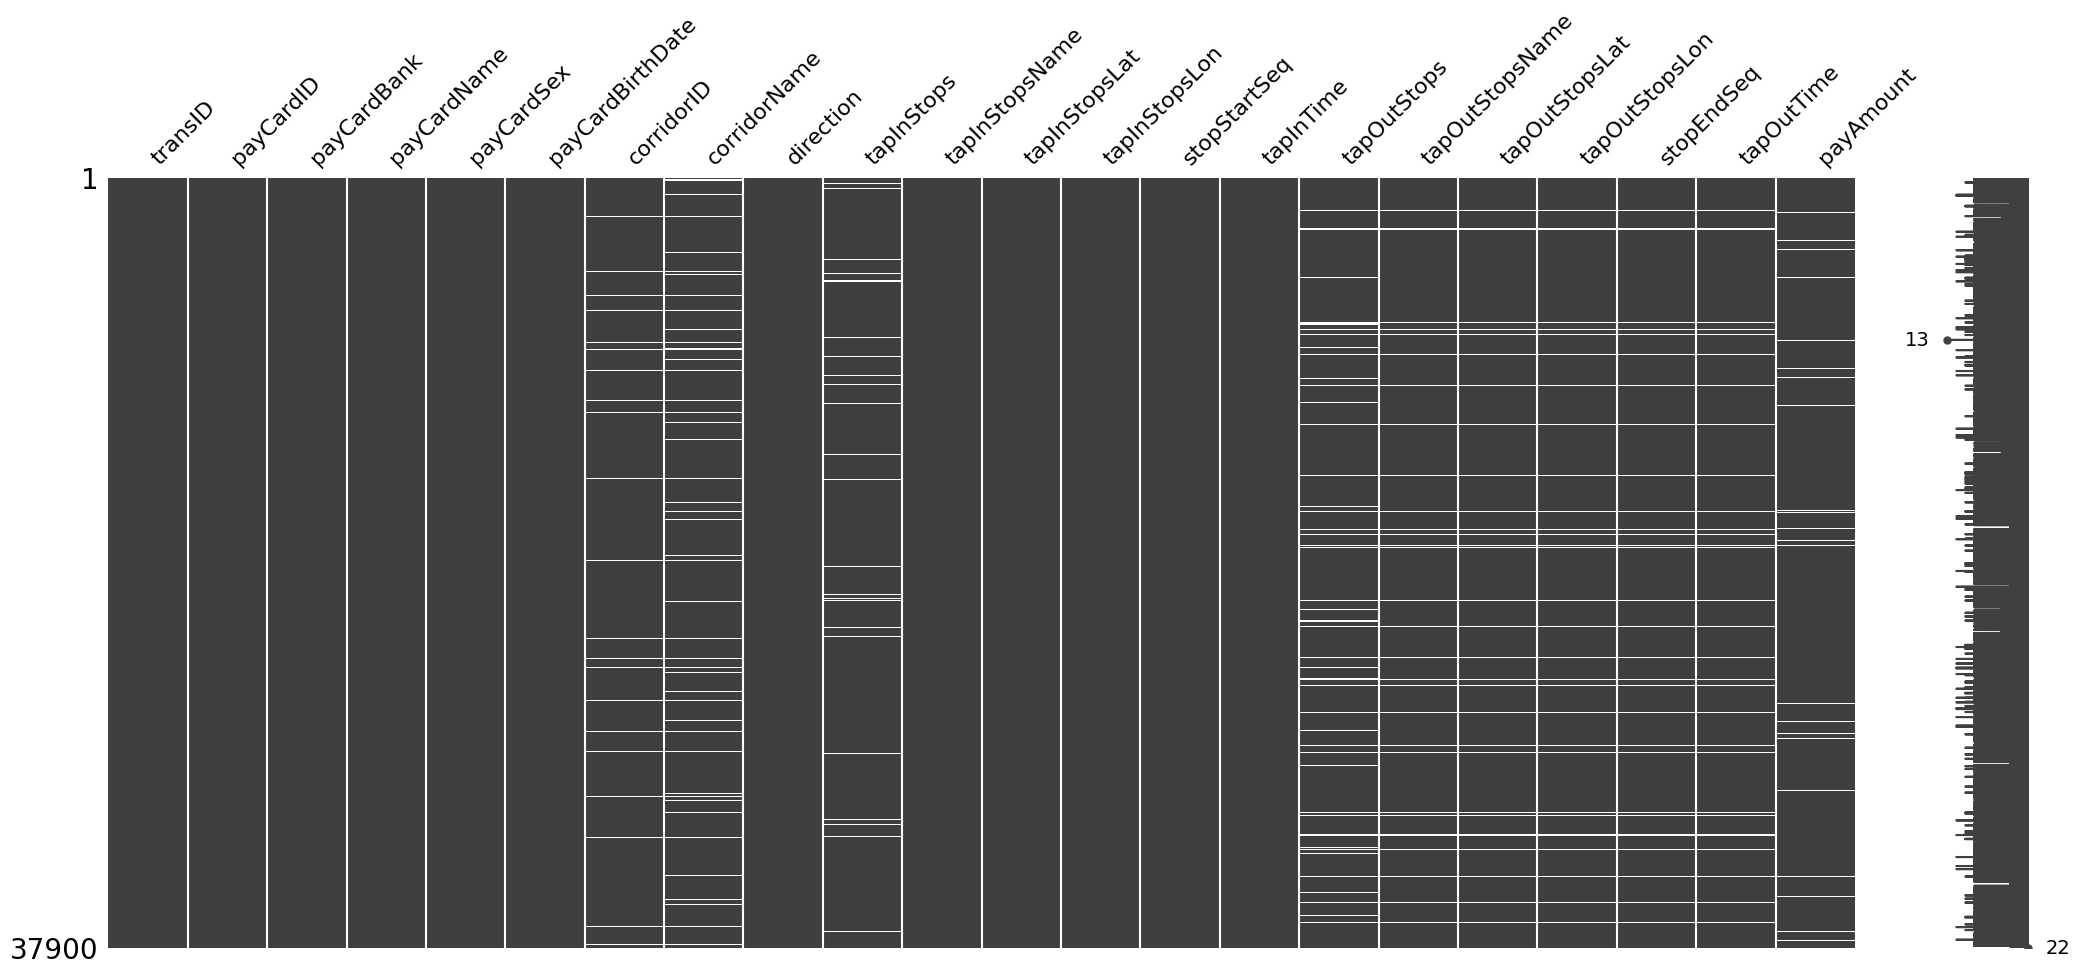

In [113]:
import missingno

missingno.matrix(df)

In [114]:
df.duplicated().sum()

np.int64(0)

In [115]:
df.loc[df['corridorID'].isna(), ['corridorID', 'corridorName']]

,corridorID,corridorName
7,NaN,NaN
120,NaN,NaN
240,NaN,NaN
250,NaN,NaN
257,NaN,NaN
...,...,...
37689,NaN,NaN
37727,NaN,NaN
37770,NaN,NaN
37797,NaN,Rusun Marunda - Terminal Terpadu Pulo Gebang


In [116]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:

- Dataset transjakarta memiliki 37900 baris dan 22 kolom
- Kolom tapInStops dan tapOutStops dihapus saja karena tidak diperlukan untuk analisis data.
- Kolom tapinTime dan tapOutTime memiliki tipe data object yang harusnya dalam bentuk datetime64ns
- 1344 row tidak memiliki data tap-out, sehingga row tersebut bisa dihapus pada analisis durasi perjalanan

## Handle Missing Data

### Kolom 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq', 'tapOutTime'

Data null pada data tap out dikarenakan penumpang tidak melakukan tap out, sehingga nilai null diganti menjadi nilai 0, lalu tambahkan kolom baru untuk menandakan apakah penumpang melakukan tap out atau tidak.

In [117]:
df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq', 'tapOutTime']] = df[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon','stopEndSeq', 'tapOutTime']].fillna(0)
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount           1007
dtype: int64

In [118]:
def no_tap_out(row):
    if row['stopEndSeq'] == 0:
        val = 'Did Not Tap Out'
    else:
        val = 'Tapped Out'
    return val

df['tappedOut'] = df.apply(no_tap_out, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tappedOut
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Tapped Out
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Tapped Out
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Tapped Out
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Tapped Out
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Tapped Out


In [119]:
df['tappedOut'].unique()

array(['Tapped Out', 'Did Not Tap Out'], dtype=object)

### Kolom 'payAmount'

In [120]:
df.loc[df['tappedOut'] == 'Did Not Tap Out', 'payAmount'].value_counts()

payAmount
3500.0     654
0.0        596
20000.0     55
Name: count, dtype: int64

In [121]:
df['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

Tarif Transjakarta ditentukan berdasarkan jenis servis yang digunakan. Berikut adalah informasi tentang tarif Transjakarta:
- Tarif 0 -> Mikrotrans, Rusun, Wisata
- Tarif 3500 -> BRT, Angkutan Penumpang (Non-BRT)
- Tarif 20000 -> Royaltrans

Analisis data untuk mendukung penjelasan diatas:

In [122]:
df.loc[df['payAmount'] == 0, 'corridorID'].unique()

array(['JAK.18', nan, 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B', 'BW9',
       'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06',
       'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19',
       'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C', '2F',
       'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E', 'JAK.13',
       'JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22', 'JAK.115',
       'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01', 'JAK.120',
       'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86', '9F', '11P',
       'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45', 'JAK.110A',
       'JAK.51', 'JAK.54', 'JAK.03', 'JAK.25', 'JAK.39', 'JAK.80',
       'JAK.11', 'JAK.17', '11K', '10B', 'JAK.30', 'JAK.58', 'JAK.34',
       '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', '12F', 'JAK.61', 'JAK.24', '11C', 'JAK.35',
       'JAK.38', 'JAK.33', 'JAK.05', '11B', 'JAK.106', 'JAK.28', '

In [123]:
df.loc[df['payAmount'] == 3500, 'corridorID'].unique()

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', nan,
       '6M', 'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E',
       'M4', '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12',
       '1N', 'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3',
       'M6', '8', '6D', '1H', '4C', 'M13', '8D', '4D', '7', '9C', 'D21',
       'D11', '8M', '1B', '12H', '7F', '6', '10H', '3E', '9', '1A', '2Q',
       '1R', '7B', 'M5'], dtype=object)

In [124]:
df.loc[df['payAmount'] == 20000, 'corridorID'].unique()

array(['1T', 'B14', 'T21', 'D32', 'S31', nan, 'B13', 'D31', '1K', '6P',
       'S12'], dtype=object)

Analisis data corridor dengan nilai payAmount null

In [125]:
df.loc[df['payAmount'].isna(), ['corridorID']].value_counts()

corridorID
M7B           309
JAK.48A       248
M1H           170
JAK.48B       159
3H             90
Name: count, dtype: int64

M7B, M1H, 3H -> BRT, Tarif = 3500 <br>
JAK.48A, JAK.48B -> Mikrotrans, Tarif = 0

In [126]:
dmap = {'M7B': 3500, 'M1H': 3500, '3H': 3500, 'JAK.48A': 0, 'JAK.48B': 0 }
df['payAmount'] = df['payAmount'].fillna(df['corridorID'].map(dmap))
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             31
tappedOut              0
dtype: int64

Data payAmount yang masih kosong dikarenakan tidak tersedianya data corridor

### Kolom 'corridorID', 'corridorName'

**Isi missing value corridorName dari data yang sudah ada** 
- Bikin DataFrame Baru dengan kolom corridorId dan corridorName
- Drop missing value di df baru
- Ambil data distinct corridorId
- Buat dictionary untuk mapping corridorId ke corridorName
- Isi missing value dengan .fillna(df['corridorId'].map)

In [127]:
df1 = df[['corridorID', 'corridorName']]

In [128]:
df_map = df1.dropna().drop_duplicates()

In [129]:
df_map['corridorID'].nunique()

221

In [130]:
df_map['corridorName'].nunique()

216

In [131]:
df_map[df_map['corridorName'].duplicated(keep=False)]

,corridorID,corridorName
0,5,Matraman Baru - Ancol
18,M9,Pinang Ranti - Pluit
29,M1,Blok M - Kota
48,2,Pulo Gadung - Monas
63,1,Blok M - Kota
92,M2,Pulo Gadung - Monas
165,M3,Kalideres - Bundaran HI via Veteran
254,3,Kalideres - Bundaran HI via Veteran
12353,9,Pinang Ranti - Pluit
32201,M5,Matraman Baru - Ancol


In [132]:
df_map.isna().sum()

corridorID      0
corridorName    0
dtype: int64

In [133]:
corridor_id = df_map['corridorID'].values
corridor_name = df_map['corridorName'].values

corridormap = {}

for key, value in zip(corridor_id, corridor_name):
    corridormap[key] = value

corridormap

{'5': 'Matraman Baru - Ancol',
 '6C': 'Stasiun Tebet - Karet via Patra Kuningan',
 'R1A': 'Pantai Maju - Kota',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '12': 'Tanjung Priok - Pluit',
 '1T': 'Cibubur - Balai Kota',
 'JAK.18': 'Kalibata - Kuningan',
 'B14': 'Bekasi Barat - Kuningan',
 '1Q': 'Rempoa - Blok M',
 '5M': 'Kampung Melayu - Tanah Abang via Cikini',
 'M7B': 'BKN - Blok M',
 '9A': 'PGC 2 - Grogol 2',
 '4': 'Pulo Gadung 2 - Tosari',
 'JAK.46': 'Pasar Minggu - Jagakarsa',
 'S22': 'Ciputat - Kampung Rambutan',
 '13': 'Ciledug - Tendean',
 '9E': 'Kebayoran Lama - Jelambar',
 'M9': 'Pinang Ranti - Pluit',
 'JAK.88': 'Terminal Tanjung Priok - Ancol Barat',
 'T11': 'Poris Plawad - Bundaran Senayan',
 'JAK.16': 'Cililitan - Condet',
 '6V': 'Ragunan - Gelora Bung Karno',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 'JAK.02': 'Kampung Melayu - Duren Sawit',
 '11': 'Pulo Gebang - Matraman',
 '1C': 'Pesanggrahan - Blok M',
 '3B': 'Rusun Flamboyan - Cengkareng',
 'M1': 'Blok M - K

In [134]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             31
tappedOut              0
dtype: int64

In [135]:
df['corridorName'].fillna(df['corridorID'].map(corridormap)).isna().sum()


np.int64(1125)

In [136]:
df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridormap))
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             31
tappedOut              0
dtype: int64

Dari pengisian missing value corridorName dari data yang ada, terisi 806 data corridorName, sehingga masih terdapat 1125 data corridorName yang masih null.

In [137]:
len(df.loc[df['corridorName'].isna() & df['corridorID'].isna(), ['corridorID', 'corridorName']])

1125

Row yang tidak memiliki data corridorID dan corridorName sebanyak 1125. corridorName yang tidak terisi dikarenakan oleh tidak adanya data corridorID.

Isi missing value corridorID berdasarkan corridorName

In [138]:
corridor_id = df_map['corridorID'].values
corridor_name = df_map['corridorName'].values

corridoridmap = {}

for key, value in zip(corridor_name, corridor_id):
    corridoridmap[key] = value

corridoridmap

{'Matraman Baru - Ancol': 'M5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': 

In [139]:
df['corridorID'].fillna(df['corridorName'].map(corridoridmap)).isna().sum()

np.int64(1125)

In [140]:
df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridoridmap))
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             31
tappedOut              0
dtype: int64

Isi missing kolom 'payAmount' yang sebelumnya hanya memiliki data 'corridorName'

In [141]:
dmap = {'M7B': 3500, 'M1H': 3500, '3H': 3500, 'JAK.48A': 0, 'JAK.48B': 0 }
df['payAmount'] = df['payAmount'].fillna(df['corridorID'].map(dmap))
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             28
tappedOut              0
dtype: int64

### Kolom 'tapInStops','tapOutStops'

Hapus kolom tapInStops, tapOutStops karena tidak dibutuhkan dalam analisis data

In [142]:
df.drop(columns=['tapInStops','tapOutStops'], inplace=True)
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1125
corridorName        1125
direction              0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount             28
tappedOut              0
dtype: int64

In [143]:
len(df) - len(df.dropna())

1125

Sisa row dengan missing value : 1125, data null dikarenakan data corridor tidak diketahui.

In [144]:
# Hapus seluruh row missing value

df.dropna(inplace=True)
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tappedOut           0
dtype: int64

In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.to_csv(r'C:\Users\kevia\.vscode\transjakarta_data_analytics\data\cleaned\data-cleaned.csv')

## Adding Column Based on Existing Data

### Tambah Kolom 'service'

Kolom untuk menentukan servis untuk rute tertentu (BRT, Royaltrans, Mikrotrans, Wisata, Rusun). Ditentukan berdasarkan kolom 'corridorID' dan 'payAmount'

In [39]:
def service_name(row):
    if row['corridorID'].startswith('JAK'):
        val = 'Mikrotrans'
    elif row['corridorID'].startswith('BW'):
        val = 'Wisata'
    elif row['payAmount'] == 0:
        val = 'Rumah Susun'
    elif row['payAmount'] == 3500:
        val = 'BRT/Non BRT'
    elif row['payAmount'] == 20000:
        val = 'Royaltrans'
    return val

df['service'] = df.apply(service_name, axis=1)
df['service'].value_counts()

service
BRT/Non BRT    18515
Mikrotrans     13488
Rumah Susun     2857
Royaltrans      1701
Wisata           214
Name: count, dtype: int64

### Kombinasi Tiap Trip Menjadi Journey

Mengkombinasikan data tiap trip untuk melihat apakah penumpang melakukan transit dalam perjalanan menuju tujuan mereka.

In [40]:
df[['tapInTime', 'tapOutTime']].head()

,tapInTime,tapOutTime
0,2023-04-03 05:21:44,2023-04-03 06:00:53
1,2023-04-03 05:42:44,2023-04-03 06:40:01
2,2023-04-03 05:59:06,2023-04-03 06:50:55
3,2023-04-03 05:44:51,2023-04-03 06:28:16
4,2023-04-03 06:17:35,2023-04-03 06:57:03


In [41]:
# Hanya gunakan data 'Tapped Out'
dftapped = df[df['tappedOut'] == 'Tapped Out'].sort_values(by=['payCardID', 'tapInTime']).reset_index()

dftapped['tapInTime'] = pd.to_datetime(dftapped['tapInTime'])
dftapped['tapOutTime'] = pd.to_datetime(dftapped['tapOutTime'])

dftapped['Duration'] = dftapped.tapOutTime-dftapped.tapInTime

In [42]:
dftapped[['payCardID', 'tapInTime']].sort_values(by=['payCardID', 'tapInTime'])

,payCardID,tapInTime
0,60403675436,2023-04-03 07:05:44
1,60403675436,2023-04-03 18:48:59
2,60403675436,2023-04-04 07:39:49
3,60403675436,2023-04-04 21:31:51
4,60403675436,2023-04-05 08:27:38
...,...,...
35473,4997693930906134609,2023-04-26 16:25:49
35474,4997693930906134609,2023-04-27 06:12:02
35475,4997693930906134609,2023-04-27 16:41:08
35476,4997693930906134609,2023-04-28 06:46:26


Memberi kondisi transit trip, dimana:
- Selisih durasi tap in pertama dengan tap in penumpang kurang dari 1 jam
- Yang melakukan tap in merupakan penumpang yang sama

In [43]:
mask1 = dftapped.tapInTime - dftapped.tapInTime.shift(1) <= pd.Timedelta('01:00:00')
mask2 = (dftapped.payCardID == dftapped.payCardID.shift(1))
mask = ( mask1 & mask2 )    

In [44]:
# Jumlah Trip Transit (True = Transit, False = Non-Transit)
mask.value_counts()

False    35478
Name: count, dtype: int64

Pada data tidak ada trip transit, berarti penumpang selalu menaiki 1 rute saja tanpa melakukan transit ke rute lain.

### Tambah Kolom 'numberOfStops'

Jumlah stasiun yang dilewati penumpang dalam suatu perjalanan.

In [45]:
(df['stopEndSeq'] - df['stopStartSeq']).astype(int)

0         5
1         8
2         1
3         6
4        10
         ..
37895    11
37896     1
37897     2
37898     1
37899     5
Length: 36775, dtype: int64

In [46]:
df['numberOfStops'] = (df['stopEndSeq'] - df['stopStartSeq']).astype(int)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,...,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tappedOut,service,numberOfStops
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,...,2023-04-03 05:21:44,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,Tapped Out,BRT/Non BRT,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,...,2023-04-03 05:42:44,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,Tapped Out,BRT/Non BRT,8
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,...,2023-04-03 05:59:06,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,Tapped Out,BRT/Non BRT,1
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,2023-04-03 05:44:51,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,Tapped Out,BRT/Non BRT,6
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,...,2023-04-03 06:17:35,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,Tapped Out,BRT/Non BRT,10


### Tambah Kolom 'tapDay', 'weekdayWeekend'

Kolom hari dilakukannya perjalanan (Senin, Selasa, dll.) dan dilakukan pada weekday atau weekend.

In [47]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

In [48]:
df['tapDay'] = df['tapInTime'].dt.dayofweek

def weekday_end(row):
    if row['tapDay'] < 5:
        return 'Weekday'
    else:
        return 'Weekend'

df['weekdayWeekend'] = df.apply(weekday_end, axis=1)

df['tapDay'] = df['tapDay'].replace(
    {
        0 : 'Monday',
        1 : 'Tuesday',
        2 : 'Wednesday',
        3 : 'Thursday',
        4 : 'Friday',
        5 : 'Saturday',
        6 : 'Sunday'
    }
)

In [49]:
df['weekdayWeekend'].value_counts()

weekdayWeekend
Weekday    33175
Weekend     3600
Name: count, dtype: int64

In [50]:
df['tapDay'].value_counts()

tapDay
Thursday     6643
Wednesday    6640
Tuesday      6637
Friday       6636
Monday       6619
Sunday       1824
Saturday     1776
Name: count, dtype: int64

### Tambah Kolom 'travelDuration', 'travelDurationPerStops'

Durasi perjalan dalam menit dan durasi perjalanan tiap pemberhentian

In [51]:
# Hanya menggunakan data 'Tapped Out'
dftapped = df[df['tappedOut'] == 'Tapped Out'].reset_index(drop=True)
dftapped['tapInTime'] = pd.to_datetime(dftapped['tapInTime'])
dftapped['tapOutTime'] = pd.to_datetime(dftapped['tapOutTime'])

dftapped['travelDuration'] = dftapped['tapOutTime'] - dftapped['tapInTime']
dftapped['travelDuration'] = dftapped['travelDuration'].dt.total_seconds()/60

In [52]:
dftapped['travelDurationPerStops'] = dftapped['travelDuration'] / dftapped['numberOfStops']

In [53]:
dftapped

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,...,stopEndSeq,tapOutTime,payAmount,tappedOut,service,numberOfStops,tapDay,weekdayWeekend,travelDuration,travelDurationPerStops
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,...,12.0,2023-04-03 06:00:53,3500.0,Tapped Out,BRT/Non BRT,5,Monday,Weekday,39.150000,7.830000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,...,21.0,2023-04-03 06:40:01,3500.0,Tapped Out,BRT/Non BRT,8,Monday,Weekday,57.283333,7.160417
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,...,39.0,2023-04-03 06:50:55,3500.0,Tapped Out,BRT/Non BRT,1,Monday,Weekday,51.816667,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,29.0,2023-04-03 06:28:16,3500.0,Tapped Out,BRT/Non BRT,6,Monday,Weekday,43.416667,7.236111
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,...,15.0,2023-04-03 06:57:03,3500.0,Tapped Out,BRT/Non BRT,10,Monday,Weekday,39.466667,3.946667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35473,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,Tosari,...,13.0,2023-04-21 19:55:49,3500.0,Tapped Out,BRT/Non BRT,11,Friday,Weekday,97.200000,8.836364
35474,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,Garuda Taman Mini,...,2.0,2023-04-18 22:28:22,3500.0,Tapped Out,BRT/Non BRT,1,Tuesday,Weekday,35.850000,35.850000
35475,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,Plaza Sentral,...,14.0,2023-04-04 13:27:25,20000.0,Tapped Out,Royaltrans,2,Tuesday,Weekday,177.633333,88.816667
35476,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,Museum Textile,...,34.0,2023-04-15 20:27:50,0.0,Tapped Out,Mikrotrans,1,Saturday,Weekend,28.400000,28.400000


### Tambah Kolom 'tapHour'

In [54]:
dftapped['tapInHour'] = dftapped['tapInTime'].dt.hour
dftapped['tapOutHour'] = dftapped['tapOutTime'].dt.hour

dftapped.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStopsName,...,payAmount,tappedOut,service,numberOfStops,tapDay,weekdayWeekend,travelDuration,travelDurationPerStops,tapInHour,tapOutHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,Pal Putih,...,3500.0,Tapped Out,BRT/Non BRT,5,Monday,Weekday,39.150000,7.830000,5,6
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,Kemenkes 2,...,3500.0,Tapped Out,BRT/Non BRT,8,Monday,Weekday,57.283333,7.160417,5,6
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,Gg. Kunir II,...,3500.0,Tapped Out,BRT/Non BRT,1,Monday,Weekday,51.816667,51.816667,5,6
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,Taman Elok 1,...,3500.0,Tapped Out,BRT/Non BRT,6,Monday,Weekday,43.416667,7.236111,5,6
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,Sunter Boulevard Barat,...,3500.0,Tapped Out,BRT/Non BRT,10,Monday,Weekday,39.466667,3.946667,6,6


## Data Analysis

#### Analisis Kondisi Operasional Transjakarta

##### Analisis Berdasarkan Servis

Pada bagian ini dilakukan analisis untuk menentukan servis serta rute Transjakarta yang perlu perhatian lebih berdasarkan keramaian servis/rute tersebut.

**- Servis apa yang memiliki jumlah penumpang terbanyak?**

In [55]:
df['service'].count()

np.int64(36775)

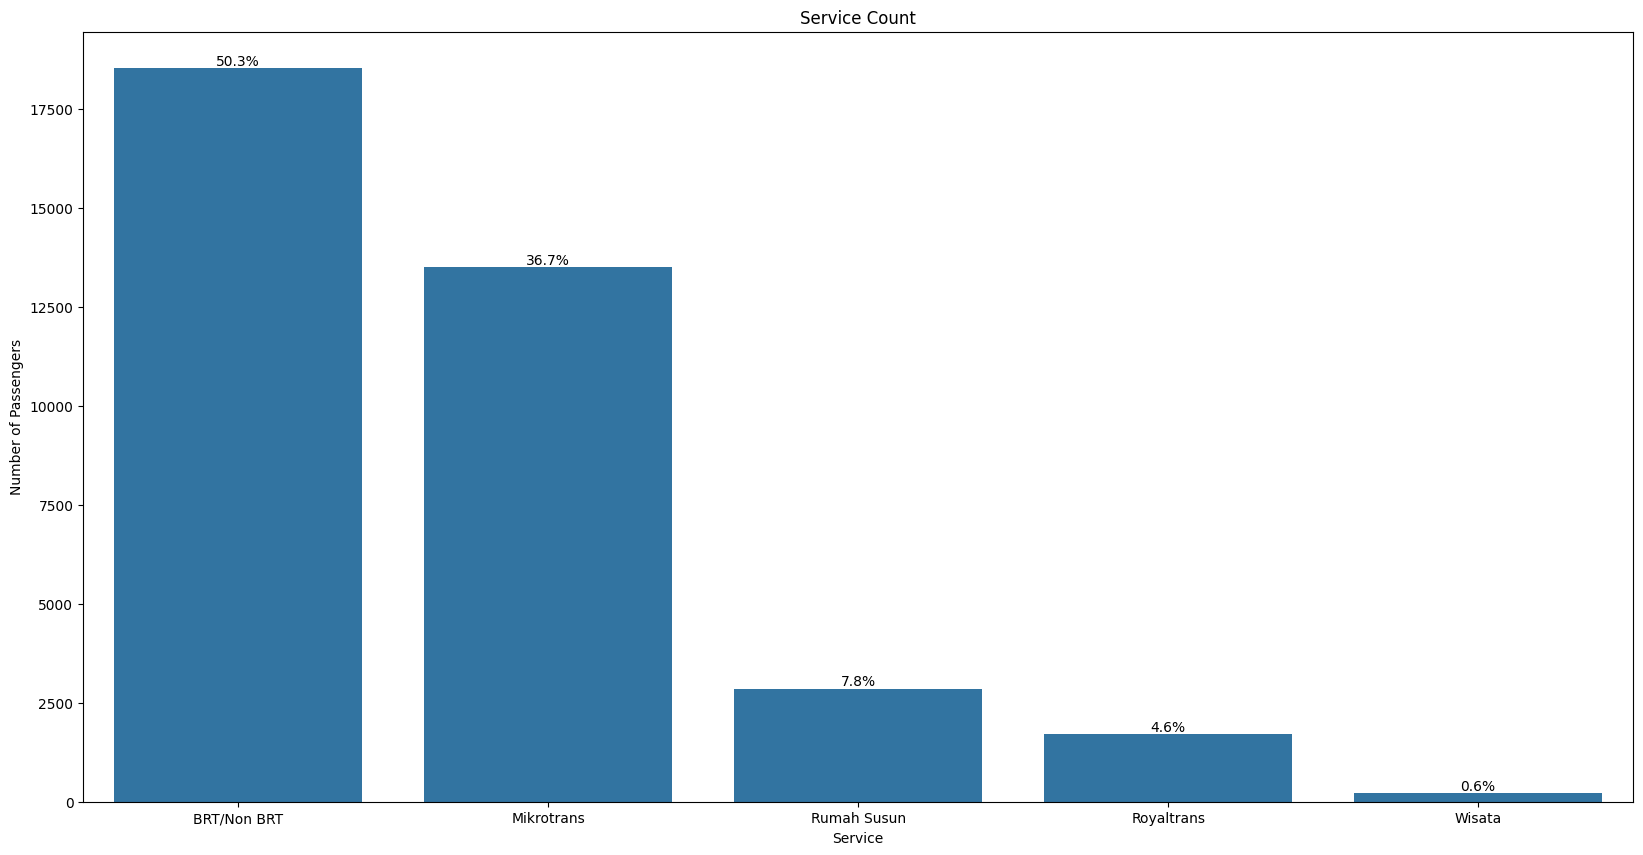

In [56]:
plt.figure(figsize=(20,10))

ax = sns.countplot(data=df, x='service', order=df['service'].value_counts().index)
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{(x/df['service'].count())*100:0.1f}%')

plt.title('Service Count')
plt.xlabel('Service')
plt.ylabel('Number of Passengers')
plt.show()

**- Servis apa yang memiliki rute terbanyak?**

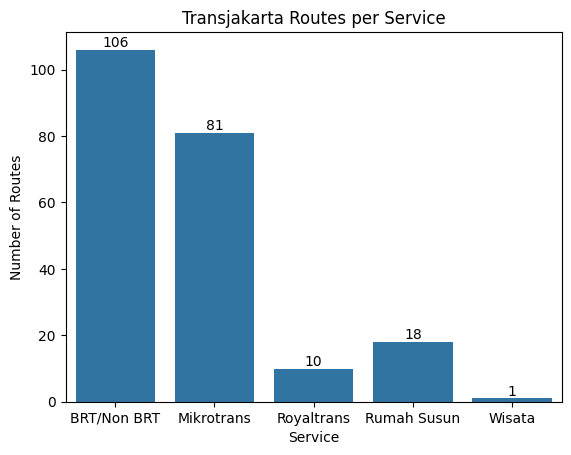

In [57]:
ax = sns.barplot(data=dftapped.groupby('service').agg({'corridorName':'nunique'}).reset_index(drop=False), x='service', y='corridorName')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Transjakarta Routes per Service')
plt.xlabel('Service')
plt.ylabel('Number of Routes')
plt.show()

**- Apakah rata-rata jumlah penumpang tiap rute berbeda untuk tiap servis?**

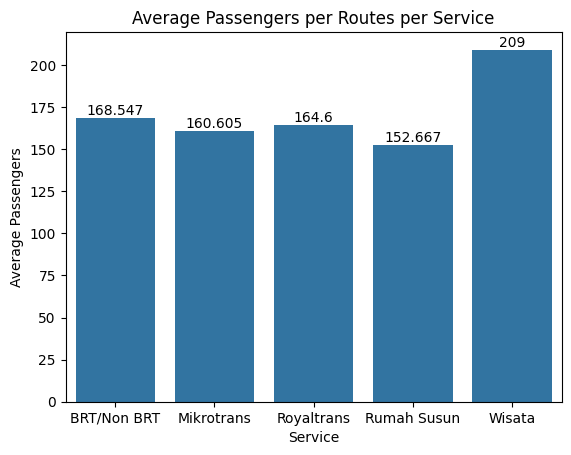

In [58]:
test = dftapped.groupby('service').agg({'corridorName':'nunique', 'corridorID':'count'}).reset_index(drop=False)
test['averagePassenger'] = test['corridorID']/test['corridorName']

ax = sns.barplot(data=test, x='service', y='averagePassenger')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Average Passengers per Routes per Service')
plt.xlabel('Service')
plt.ylabel('Average Passengers')
plt.show()

Insight: Jumlah penumpang serta jumlah rute sebagian besar terdapat pada servis BRT/Non BRT dan Mikrotrans, sedangkan Royaltrans, Rumah Susun, dan Wisata hanya terdiri sebagian kecil dari total penumpang dan rute.

Namun, ditemukan bahwa rata-rata jumlah penumpang per rute terbanyak terdapat pada servis Wisata sebanyak 209. Jumlah tinggi tersebut dapat dikarenakan pada data ini hanya terdapat 1 rute untuk servis Wisata. Sedangkan rata-rata jumlah penumpang per rute pada servis lain tidak berbeda jauh antar satu sama lain dengan kisaran 152-168 rata-rata penumpang. Hal ini menunjukkan bahwa jenis servis tidak mempengaruhi jumlah penumpang.

Berdasarkan temuan ini, direkomendasikan untuk mengidentifikasi rute dengan jumlah penumpang terbanyak untuk menentukan prioritas peningkatan pelayanan dan perbaikan infrastruktur dibandingkan dengan mengidentifikasi jenis servis secara keseluruhan.

##### Analisis Berdasarkan Rute

- **Rute mana saja dengan jumlah penumpang terbanyak?**

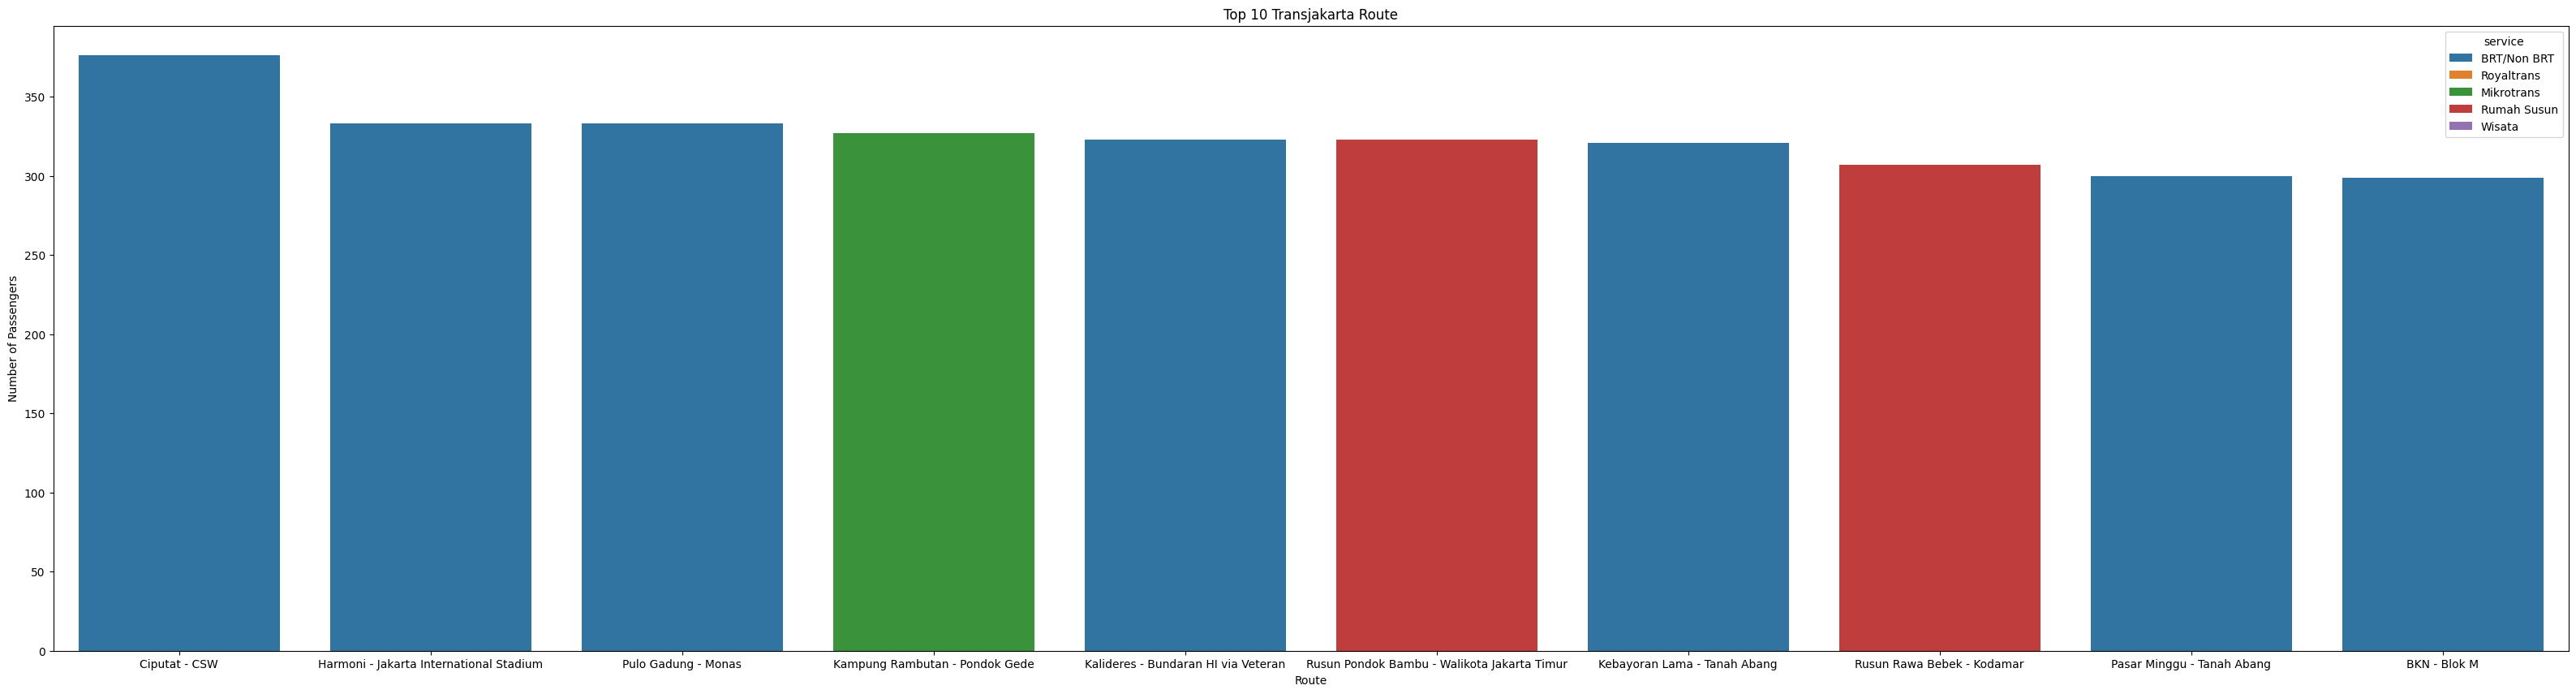

In [59]:
plt.figure(figsize=(40,10))

sns.countplot(data=dftapped, x='corridorName', hue='service', palette= 'tab10' ,order= dftapped['corridorName'].value_counts().iloc[1:11].index, width=0.8)

plt.title('Top 10 Transjakarta Route')
plt.xlabel('Route')
plt.ylabel('Number of Passengers')
plt.show()

- **Stasiun mana saja dengan jumlah penumpang terbanyak?**

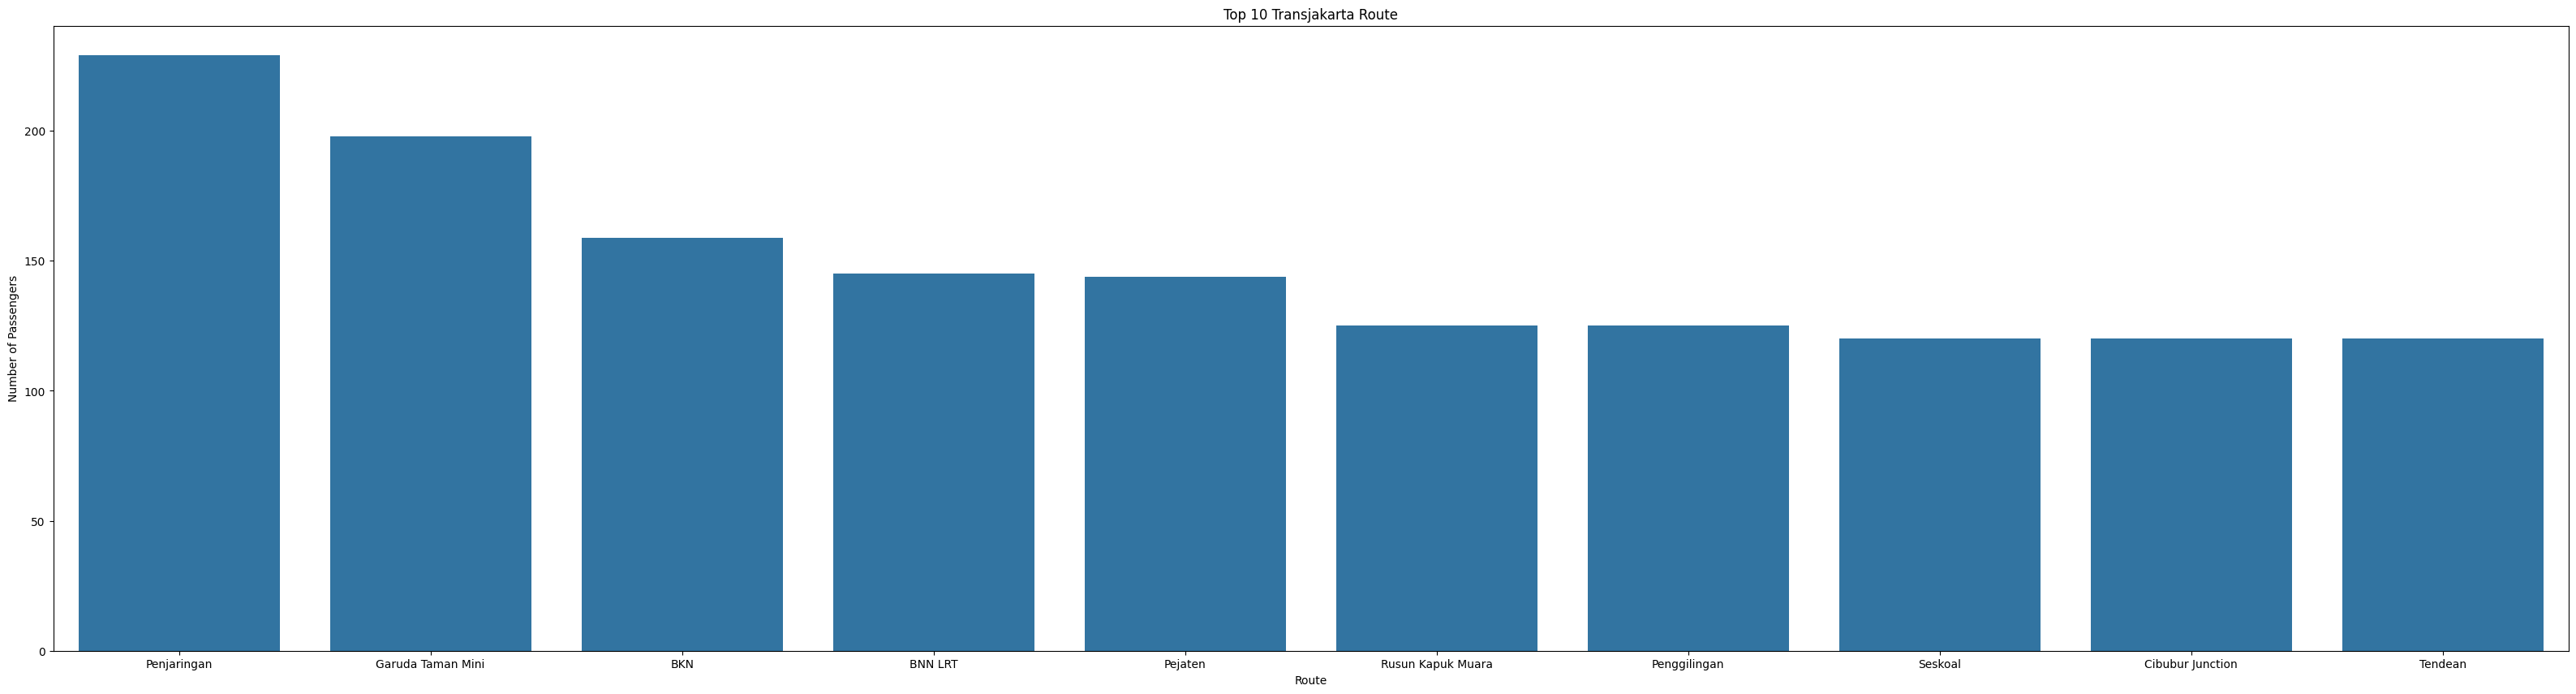

In [102]:
plt.figure(figsize=(40,10))

sns.countplot(data=dftapped, x='tapInStopsName', order= dftapped['tapInStopsName'].value_counts().iloc[:10].index)

plt.title('Top 10 Transjakarta Route')
plt.xlabel('Route')
plt.ylabel('Number of Passengers')
plt.show()

##### Analisis Jam Sibuk

- **Pada jam berapa saja terdapat banyaknya jumlah penumpang?**

Text(0, 0.5, 'Number of Tap Ins')

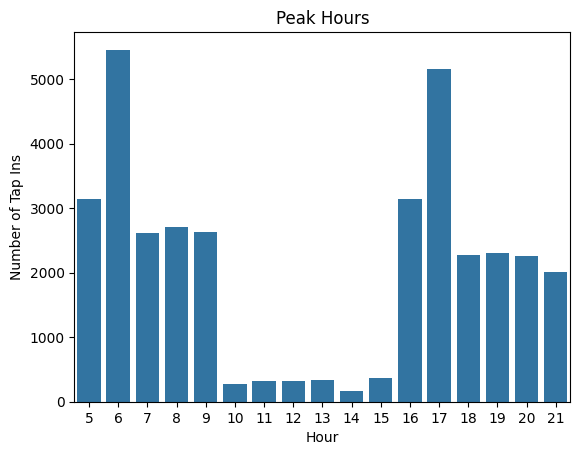

In [60]:
sns.countplot(data=dftapped, x='tapInHour')
plt.title('Peak Hours')
plt.xlabel('Hour')
plt.ylabel('Number of Tap Ins')

Insight: Jam sibuk Transjakarta terjadi pada jam-jam tertentu, yaitu pada pagi hari (05.00-09.00 WIB) dan sore hari (16.00-21.00 WIB). Hal ini disebabkan oleh jadwal berangkat dan pulangnya penumpang bekerja atau bersekolah.

#### Analisis Durasi Perjalanan

Pada bagian ini dilakukan analisis untuk menjawab pertanyaan-pertanyaan berikut:
- Servis mana saja yang memiliki durasi perjalanan terlama?
- Faktor apa saja yang mempengaruhi durasi perjalanan?
- Bagaimana performa durasi perjalanan tiap servis?

##### **Servis mana saja yang memiliki durasi perjalanan terlama?**

Text(0, 0.5, 'Travel Duration per Stops (minutes)')

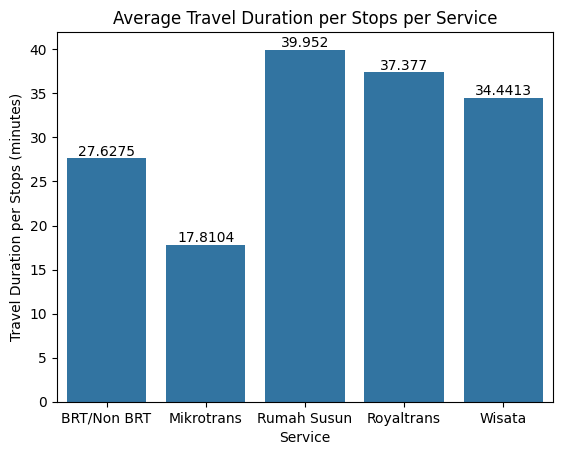

In [61]:
ax =sns.barplot(data=dftapped, x='service', y='travelDurationPerStops', errorbar=None, estimator='mean', order= df['service'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Average Travel Duration per Stops per Service')
plt.xlabel('Service')
plt.ylabel('Travel Duration per Stops (minutes)')

Insight: Servis dengan durasi perjalanan terlama adalah Rumah Susun, Royaltrans, dan Wisata, dengak kisaran waktu 34-40 menit.

##### **Faktor apa saja yang mempengaruhi durasi perjalanan?**

Faktor Jumlah Penumpang

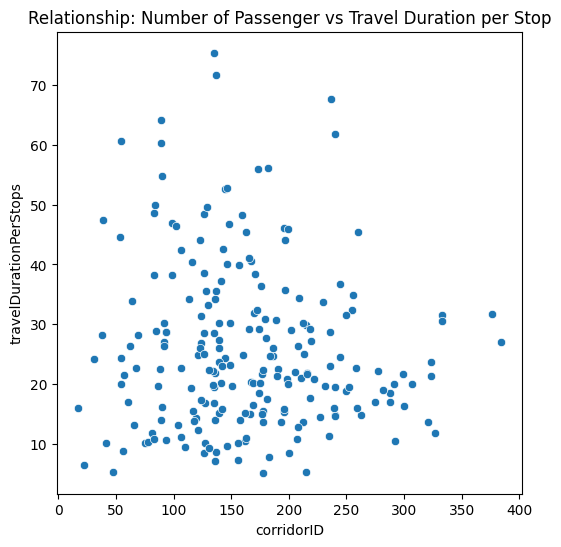

In [62]:
plt.figure(figsize=(6,6))

sns.scatterplot(data=dftapped.groupby('corridorName').agg({'corridorID': 'count', 'travelDurationPerStops': 'mean'}), 
                x='corridorID', y='travelDurationPerStops')

plt.title('Relationship: Number of Passenger vs Travel Duration per Stop')

plt.show()

Insight: Tidak ada korelasi antara jumlah penumpang dan durasi perjalanan

Faktor Waktu (Jam)

In [63]:
hourduration =  dftapped.groupby('tapInHour').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False)

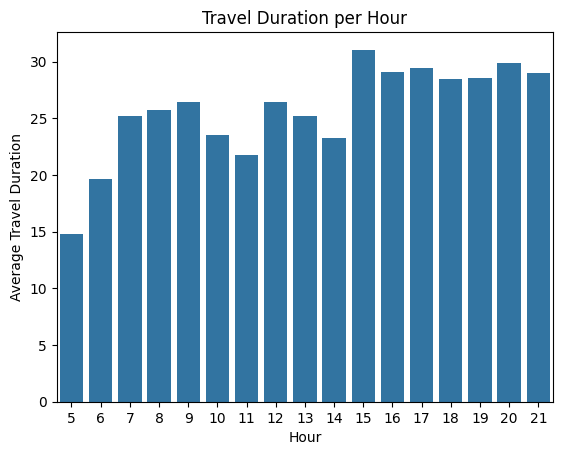

In [64]:
ax =sns.barplot(data=dftapped, x='tapInHour', y='travelDurationPerStops', errorbar=None, estimator='mean')
plt.title('Travel Duration per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Travel Duration')
plt.show()

Insight: Pada jam sibuk pagi hari (05.00 - 09.00 WIB), terdapat fluktuasi durasi perjalanan mulai pada jam 07.00 hingga 09.00. sedangkan pada siang hari (10.00 - 14.00 WIB) fluktuasi terjadi pada jam 12:00 - 13.00. Kemudian fluktuasi selanjutnya terjadi pada jam 15.00, dan durasi perjalanan tetap relatif tinggi hingga jam 21.00.

Tingginya durasi perjalanan pada jam sibuk dikarenakan oleh tingkat kemacetan di Jakarta, dimana 54% kemacetan terjadi pada jam 06.00 - 09.00 WIB dan 15.00 keatas, sedangkan pada jam 10.00 - 14.00 WIB lalu litas lenggang (Kompas, 2023).

Faktor Hari

Text(50.72222222222221, 0.5, 'Travel Duration per Stop')

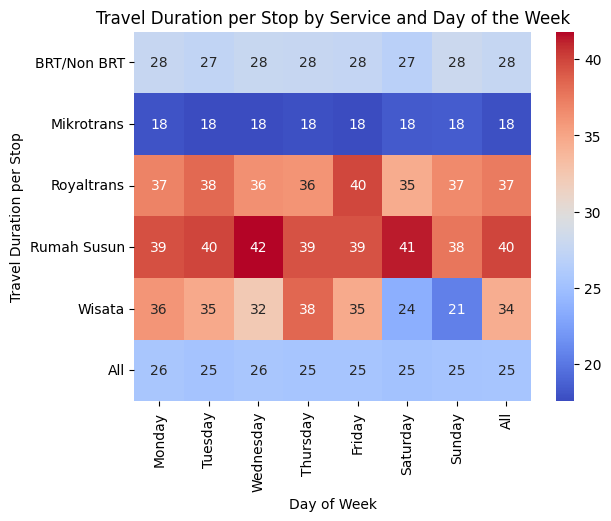

In [65]:
dayser = dftapped.pivot_table(values='travelDurationPerStops', index='service',columns='tapDay', aggfunc='mean', margins=True).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'All'])
sns.heatmap(data=dayser, annot=True, cmap='coolwarm')

plt.title('Travel Duration per Stop by Service and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Travel Duration per Stop')

Insight: Selain servis Wisata, tidak terdapat perbedaan durasi perjalanan secara signifikan tiap harinya untuk tiap servis. Namun, perlu diingat bahwa hanya terdapat 1 rute pada servis Wisata, sehingga, diperlukan analisis pengaruh hari untuk tiap rute.

In [66]:
# pivot_dayhour = dftapped.pivot_table(values='corridorName', index='tapInHour',columns='tapDay', aggfunc=len).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.figure(figsize=(12,8))
# sns.heatmap(data=pivot_dayhour, annot=True, cmap='coolwarm', fmt='g')

##### **Bagaimana performa durasi perjalanan tiap servis?**

###### BRT/Non BRT

In [67]:
brtduration =  dftapped[dftapped['service'] == 'BRT/Non BRT'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False)
brtduration10 =  dftapped[dftapped['service'] == 'BRT/Non BRT'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False).iloc[:10]

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\476730033.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=brtduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')


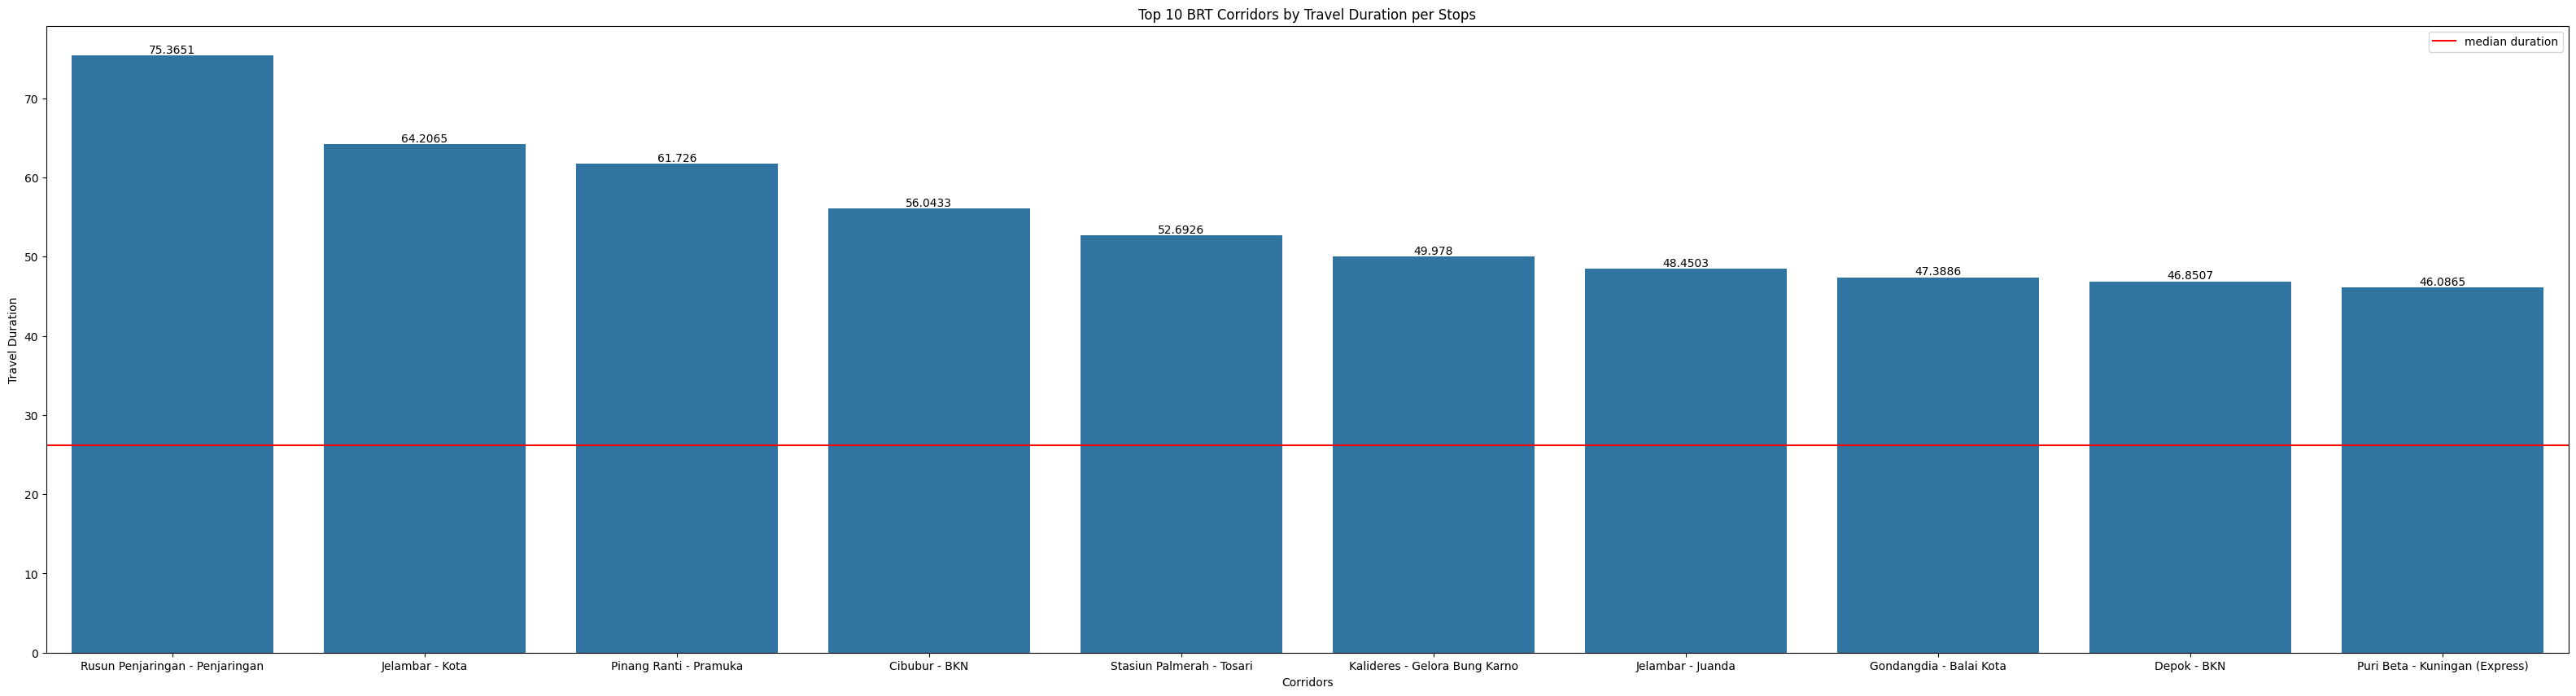

In [68]:
plt.figure(figsize=(40,10))
ax = sns.barplot(data=brtduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.axhline(y=brtduration['travelDurationPerStops'].median(), color='r', label='median duration')
plt.legend()

plt.title('Top 10 BRT Corridors by Travel Duration per Stops')
plt.xlabel('Corridors')
plt.ylabel('Travel Duration')
plt.show()

In [69]:
pivot_day = dftapped[dftapped['service'] == 'BRT/Non BRT'].pivot_table(values='travelDurationPerStops', index='corridorName',columns='tapDay', aggfunc='mean', margins=True).sort_values(by='All', ascending=False).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'All']).iloc[:10]

Text(50.7222222222222, 0.5, 'Route')

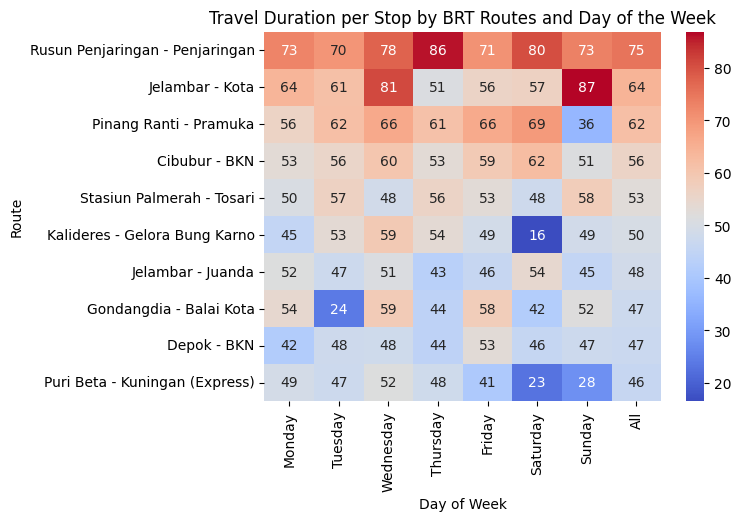

In [70]:
sns.heatmap(data=pivot_day, annot=True, cmap='coolwarm')
plt.title('Travel Duration per Stop by BRT Routes and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Route')

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\1498869082.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dftapped[dftapped['service'] == 'BRT/Non BRT'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)


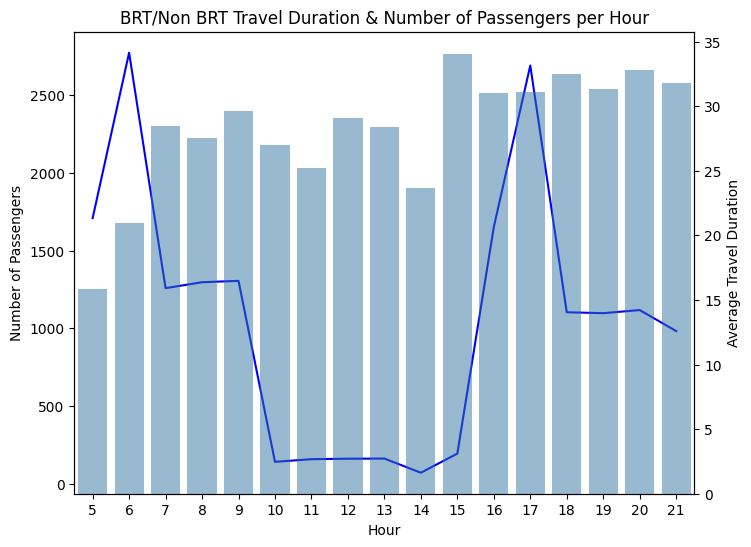

In [92]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(dftapped[dftapped['service'] == 'BRT/Non BRT'].groupby('tapInHour').agg({'corridorID':'count'}).reset_index(drop=True), color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
ax2 = ax1.twinx()


sns.barplot(data=dftapped[dftapped['service'] == 'BRT/Non BRT'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)
plt.ylabel('Average Travel Duration')
plt.title('BRT/Non BRT Travel Duration & Number of Passengers per Hour')
plt.show()

Insight:
- Tidak ada pola tertentu untuk rata-rata durasi perjalanan per hari untuk tiap rute.
- Pada jam 07.00 - 13.00, rata-rata durasi perjalanan relatif tinggi, berkisar 25-30 menit. Kemudian pada jam 15.00-21.00, rata-rata durasi perjalanan relatif sangat tinggi, dimana durasi perjalanan selalu diatas 30 menit.

### Mikrotrans

In [72]:
mkduration =  dftapped[dftapped['service'] == 'Mikrotrans'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False)
mkduration10 =  dftapped[dftapped['service'] == 'Mikrotrans'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False).iloc[:10]

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\4243741438.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=mkduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')


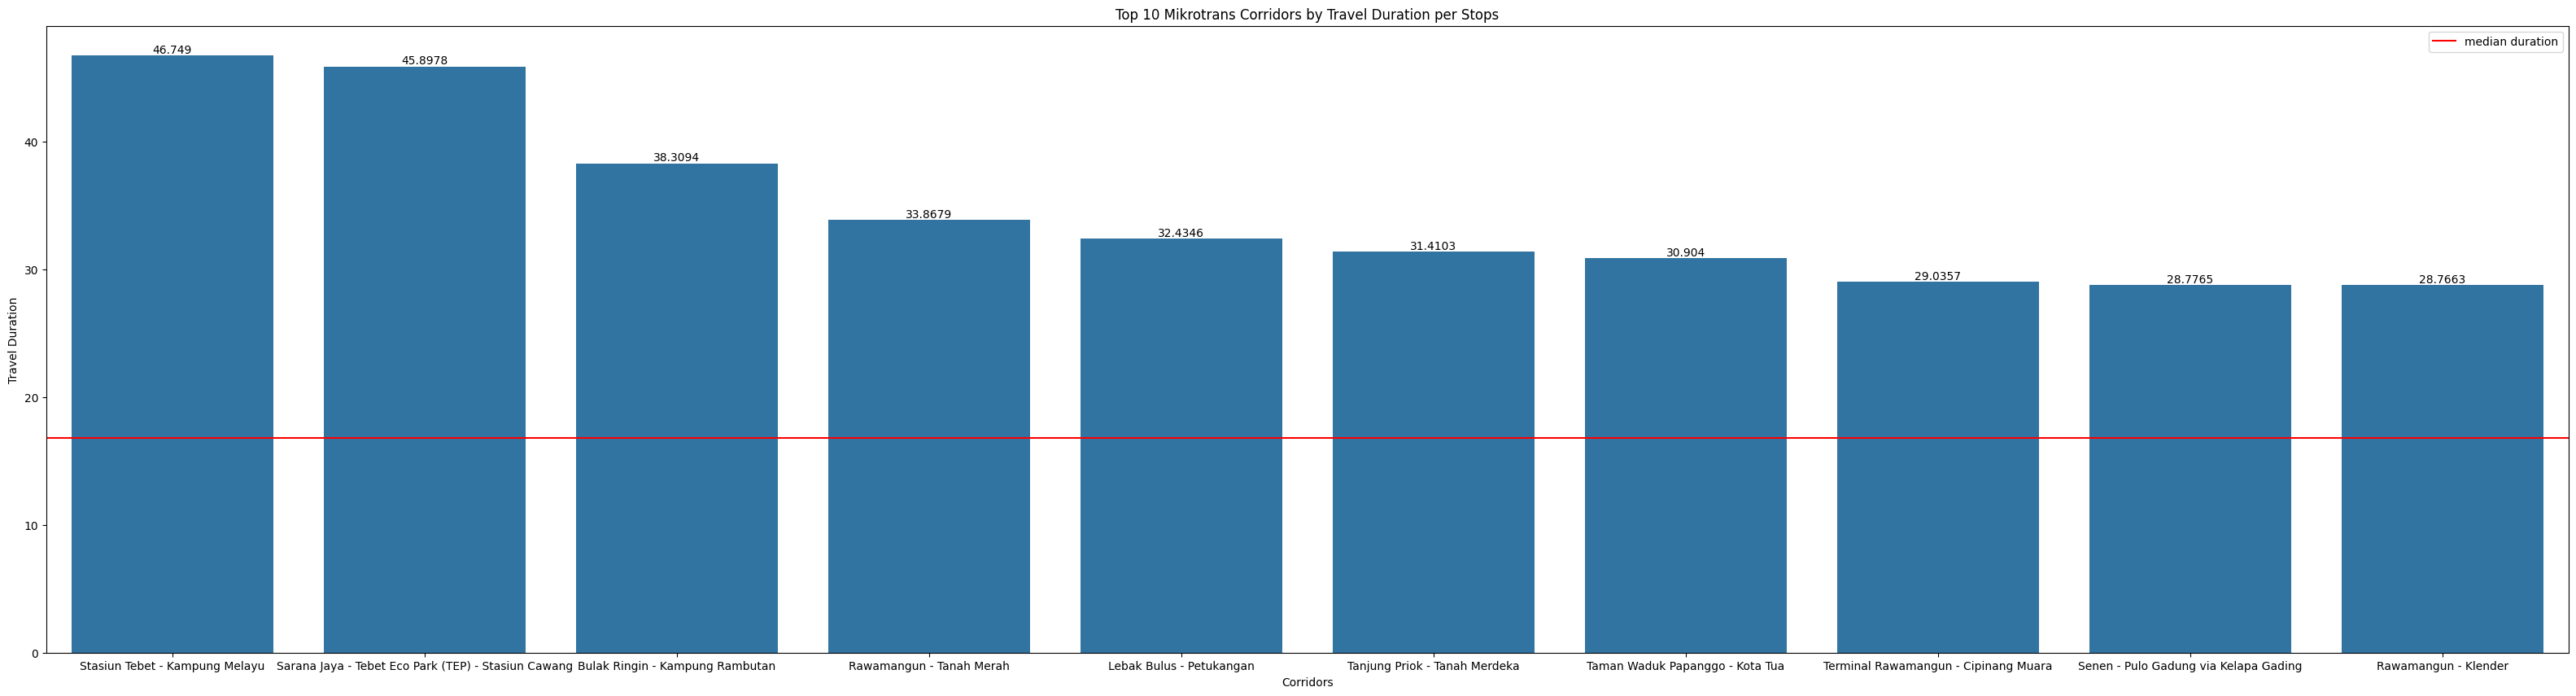

In [73]:
plt.figure(figsize=(40,10))
ax = sns.barplot(data=mkduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.axhline(y=mkduration['travelDurationPerStops'].median(), color='r', label='median duration')
plt.legend()

plt.title('Top 10 Mikrotrans Corridors by Travel Duration per Stops')
plt.xlabel('Corridors')
plt.ylabel('Travel Duration')
plt.show()

In [74]:
pivot_day = dftapped[dftapped['service'] == 'Mikrotrans'].pivot_table(values='travelDurationPerStops', index='corridorName',columns='tapDay', aggfunc='mean', margins=True).sort_values(by='All', ascending=False).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'All']).iloc[:10]

Text(50.72222222222219, 0.5, 'Route')

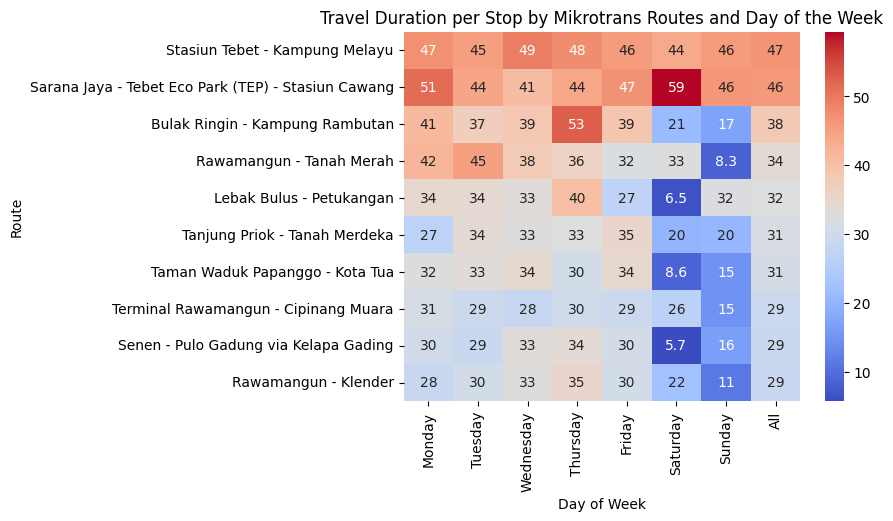

In [75]:
sns.heatmap(data=pivot_day, annot=True, cmap='coolwarm')
plt.title('Travel Duration per Stop by Mikrotrans Routes and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Route')

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\828888459.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dftapped[dftapped['service'] == 'Mikrotrans'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)


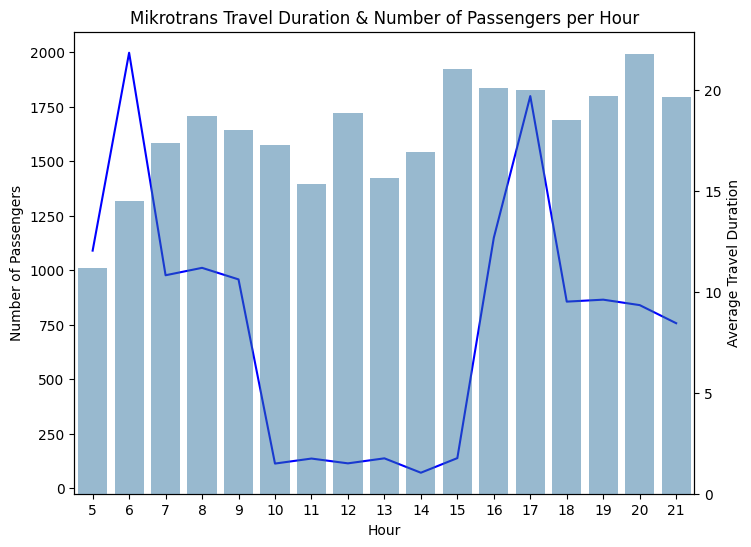

In [91]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(dftapped[dftapped['service'] == 'Mikrotrans'].groupby('tapInHour').agg({'corridorID':'count'}).reset_index(drop=True), color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
ax2 = ax1.twinx()


sns.barplot(data=dftapped[dftapped['service'] == 'Mikrotrans'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)
plt.ylabel('Average Travel Duration')
plt.title('Mikrotrans Travel Duration & Number of Passengers per Hour')
plt.show()

Insight:
- Tidak ada pola tertentu untuk rata-rata durasi perjalanan per hari untuk tiap rute.
- Pada jam 07.00 - 10.00 dan jam 12.00, rata-rata durasi perjalanan relatif tinggi, berkisar 15-17 menit. Kemudian pada jam 15.00-21.00, rata-rata durasi perjalanan kembali fluktuasi, dimana durasi perjalanan berkisar 18-21 menit.

### Rumah Susun

In [77]:
rsduration =  dftapped[dftapped['service'] == 'Rumah Susun'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False)
rsduration10 =  dftapped[dftapped['service'] == 'Rumah Susun'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False).iloc[:10]

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\714311346.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=rsduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')


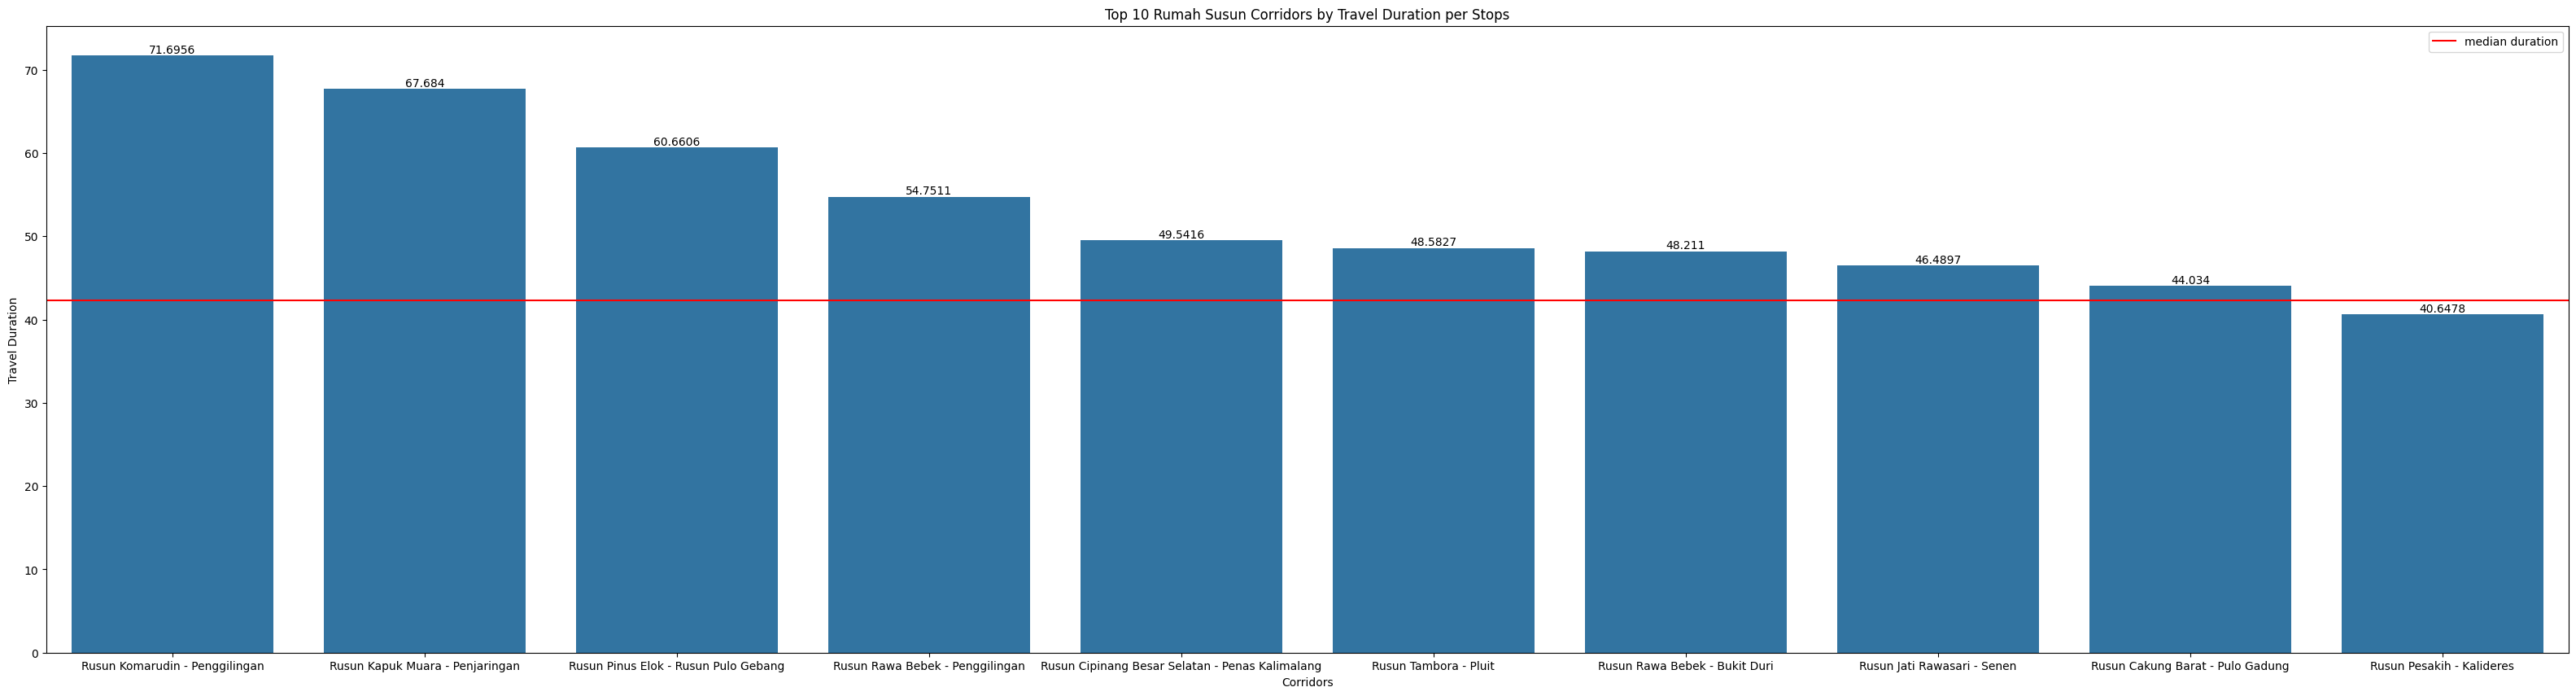

In [78]:
plt.figure(figsize=(40,10))
ax = sns.barplot(data=rsduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.axhline(y=rsduration['travelDurationPerStops'].median(), color='r', label='median duration')
plt.legend()

plt.title('Top 10 Rumah Susun Corridors by Travel Duration per Stops')
plt.xlabel('Corridors')
plt.ylabel('Travel Duration')
plt.show()

In [79]:
pivot_day = dftapped[dftapped['service'] == 'Rumah Susun'].pivot_table(values='travelDurationPerStops', index='corridorName',columns='tapDay', aggfunc='mean', margins=True).sort_values(by='All', ascending=False).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'All']).iloc[:10]

Text(50.72222222222219, 0.5, 'Route')

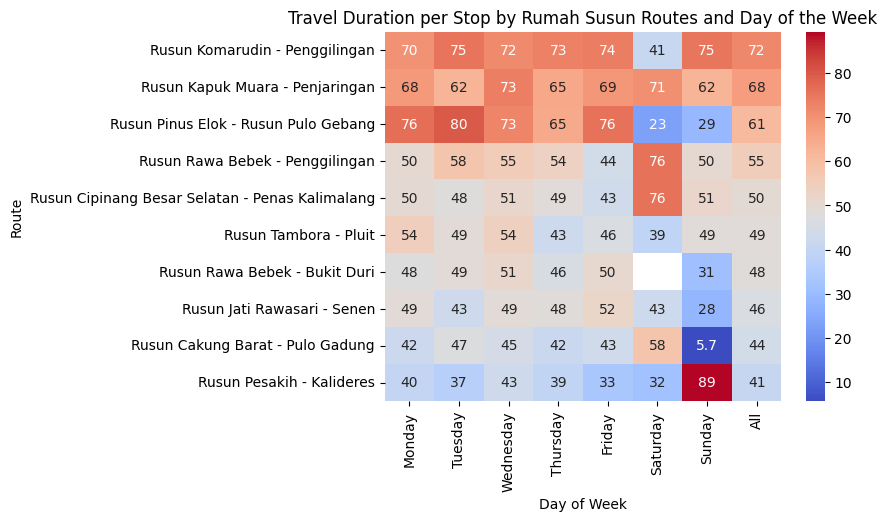

In [80]:
sns.heatmap(data=pivot_day, annot=True, cmap='coolwarm')
plt.title('Travel Duration per Stop by Rumah Susun Routes and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Route')

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\190289502.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dftapped[dftapped['service'] == 'Rumah Susun'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)


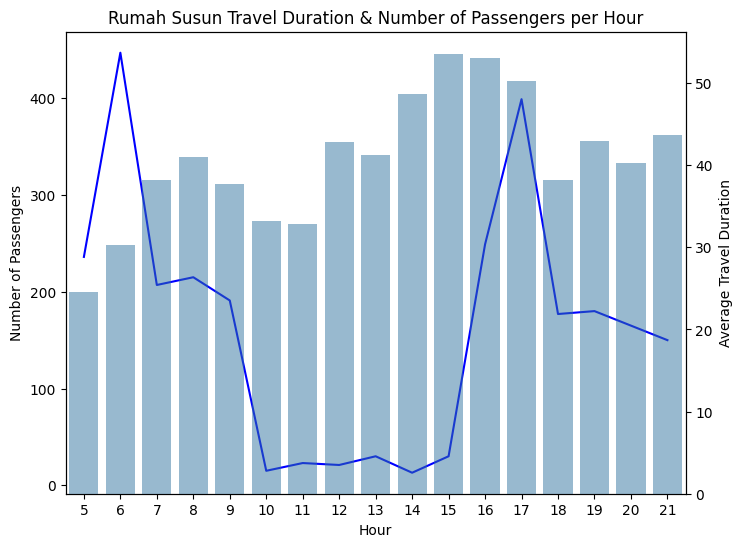

In [90]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(dftapped[dftapped['service'] == 'Rumah Susun'].groupby('tapInHour').agg({'corridorID':'count'}).reset_index(drop=True), color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
ax2 = ax1.twinx()


sns.barplot(data=dftapped[dftapped['service'] == 'Rumah Susun'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)
plt.ylabel('Average Travel Duration')
plt.title('Rumah Susun Travel Duration & Number of Passengers per Hour')
plt.show()

Insight:
- Tidak ada pola tertentu untuk rata-rata durasi perjalanan per hari untuk tiap rute.
- Pada jam 14.00 - 17.00, rata-rata durasi perjalanan mencapai nilai tertinggi dibanding waktu lainnya, dengan durasi berkisar 48-52 menit.

### Royaltrans

In [83]:
rtduration =  dftapped[dftapped['service'] == 'Royaltrans'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False)
rtduration10 =  dftapped[dftapped['service'] == 'Royaltrans'].groupby('corridorName').agg({'travelDurationPerStops': 'mean'}).sort_values(by='travelDurationPerStops', ascending=False).iloc[:10]

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\2217792449.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=rtduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')


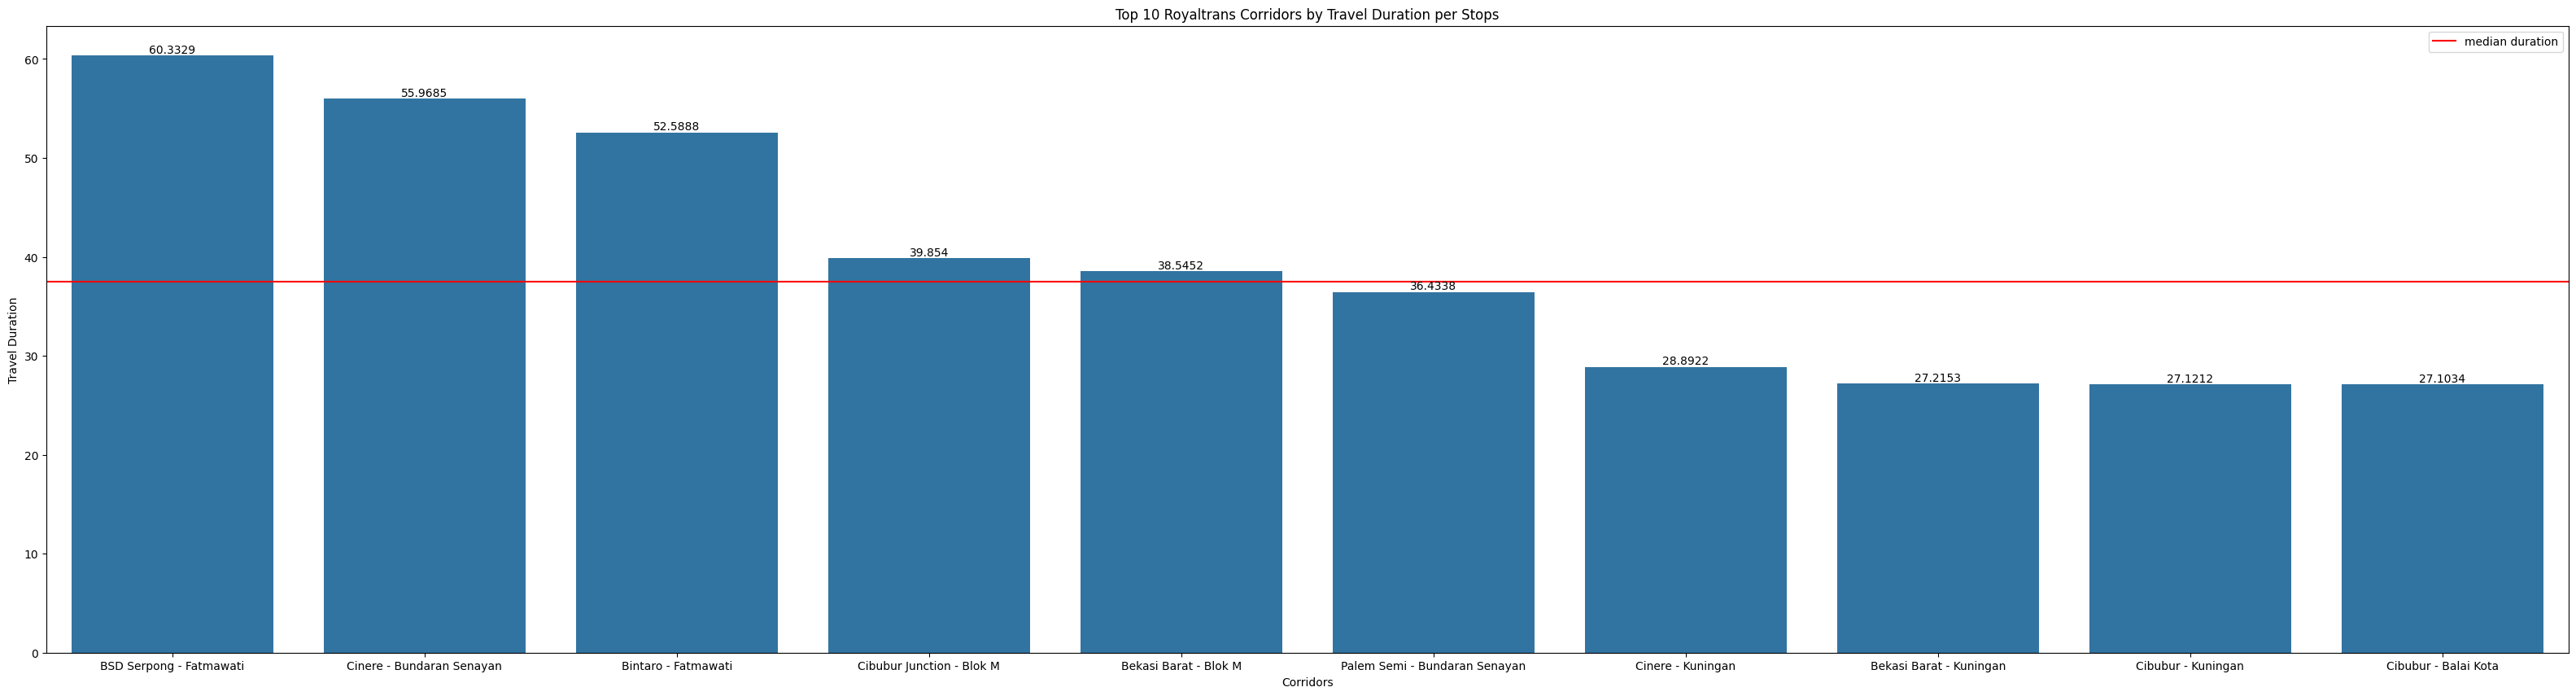

In [84]:
plt.figure(figsize=(40,10))
ax = sns.barplot(data=rtduration10, x='corridorName', y='travelDurationPerStops', ci=0, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.axhline(y=rtduration['travelDurationPerStops'].median(), color='r', label='median duration')
plt.legend()

plt.title('Top 10 Royaltrans Corridors by Travel Duration per Stops')
plt.xlabel('Corridors')
plt.ylabel('Travel Duration')
plt.show()

In [85]:
pivot_day = dftapped[dftapped['service'] == 'Royaltrans'].pivot_table(values='travelDurationPerStops', index='corridorName',columns='tapDay', aggfunc='mean', margins=True).sort_values(by='All', ascending=False).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'All']).iloc[:10]

Text(50.7222222222222, 0.5, 'Route')

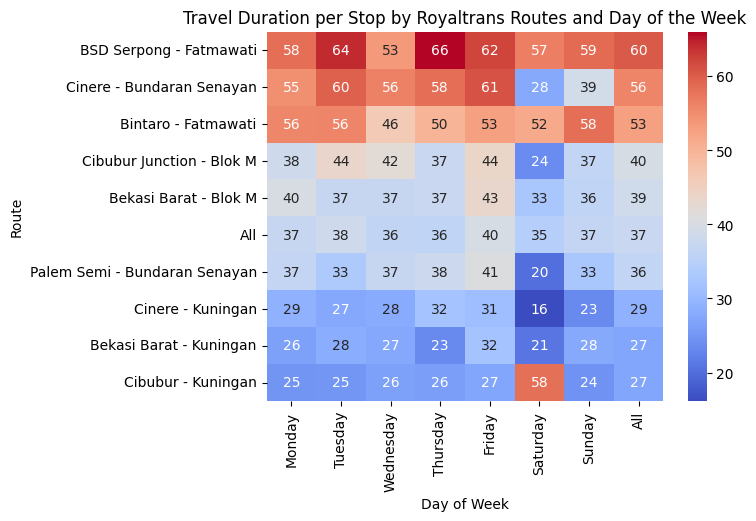

In [86]:
sns.heatmap(data=pivot_day, annot=True, cmap='coolwarm')
plt.title('Travel Duration per Stop by Royaltrans Routes and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Route')

C:\Users\kevia\AppData\Local\Temp\ipykernel_27496\3396546295.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=dftapped[dftapped['service'] == 'Royaltrans'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)


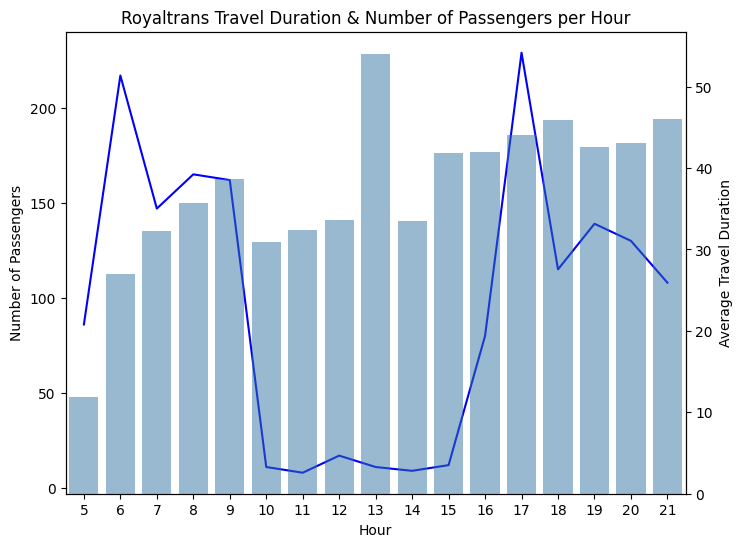

In [89]:
fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(dftapped[dftapped['service'] == 'Royaltrans'].groupby('tapInHour').agg({'corridorID':'count'}).reset_index(drop=True), color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Passengers')
ax2 = ax1.twinx()


sns.barplot(data=dftapped[dftapped['service'] == 'Royaltrans'], x='tapInHour', y='travelDurationPerStops', ci=0, estimator='mean', alpha=0.5,ax=ax2)
plt.ylabel('Average Travel Duration')
plt.title('Royaltrans Travel Duration & Number of Passengers per Hour')
plt.show()

Insight:
- Tidak ada pola tertentu untuk rata-rata durasi perjalanan per hari untuk tiap rute.
- Pada jam 13.00, rata-rata durasi perjalanan mencapai nilai tertinggi. Kemudian, pada jam 15.00 - 21.00 rata-rata durasi perjalanan relatif tinggi berkisar 42-45 menit.

## Kesimpulan & Rekomendasi

### Kesimpulan

Dari analisis yang telah dilakukan, berikut kesimpulan yang dapat diambil: <br>

**Analisis Kondisi Operasional**
- Jumlah penumpang serta jumlah rute sebagian besar terdapat pada servis BRT/Non BRT dan Mikrotrans
- Rata-rata jumlah penumpang per rute untuk tiap servis relatif sama
- Rute dengan jumlah penumpang terbanyak adalah Ciputat - CSW, Harmoni - JIS, dan Pulo Gadung - Monas
- Stasiun dengan jumlah penumpang terbanyak adalah Penjaringan, Garuda Taman Mini, dan BKN
- Jam sibuk Transjakarta terjadi pada jam-jam tertentu, yaitu pada pagi hari (05.00-09.00 WIB) dan sore hari (16.00-21.00 WIB).

**Analisis Durasi Perjalanan**
- Servis dengan durasi perjalanan terlama adalah Rumah Susun, Royaltrans, dan Wisata, dengak kisaran waktu 34-40 menit.
- Tidak ada korelasi antara jumlah penumpang dan durasi perjalanan
- Fluktuasi awal durasi perjalanan mulai pada jam 07.00 hingga 09.00. Kemudian pada siang hari, fluktuasi terjadi pada jam 12:00 - 13.00. Kemudian fluktuasi selanjutnya terjadi pada jam 15.00, dan durasi perjalanan tetap relatif tinggi hingga jam 21.00.
- Selain servis Wisata, tidak terdapat perbedaan durasi perjalanan secara signifikan tiap harinya untuk tiap servis.

**Analisis Performa Durasi Perjalanan Tiap Servis**

BRT/Non BRT
- Rute dengan rata-rata durasi terlama adalah Rusun Penjaringan - Penjaringan
- Pada jam 07.00 - 13.00, rata-rata durasi perjalanan relatif tinggi, berkisar 25-30 menit. Kemudian pada jam 15.00-21.00, rata-rata durasi perjalanan relatif sangat tinggi, dimana durasi perjalanan selalu diatas 30 menit.

Mikrotrans
- Rute dengan rata-rata durasi terlama adalah Stasiun Tebet - Kampung Melayu
- Pada jam 07.00 - 10.00 dan jam 12.00, rata-rata durasi perjalanan relatif tinggi, berkisar 15-17 menit. Kemudian pada jam 15.00-21.00, rata-rata durasi perjalanan kembali fluktuasi, dimana durasi perjalanan berkisar 18-21 menit.

Rumah Susun
- Rute dengan rata-rata durasi terlama adalah Rusun Komarudin - Penggilingan
- Pada jam 14.00 - 17.00, rata-rata durasi perjalanan mencapai nilai tertinggi dibanding waktu lainnya, dengan durasi berkisar 48-52 menit.

Royaltrans
- Rute dengan rata-rata durasi terlama adalah BSD Serpong - Fatmawati
- Pada jam 13.00, rata-rata durasi perjalanan mencapai nilai tertinggi. Kemudian, pada jam 15.00 - 21.00 rata-rata durasi perjalanan relatif tinggi berkisar 42-45 menit.

### Rekomendasi

1. Prioritaskan peningkatan pelayanan pada rute Ciputat - CSW, Harmoni - JIS, dan Pulo Gadung - Monas
2. Prioritaskan peningkatan pelayanan dan infrastruktur pada halte Penjaringan, Garuda Taman Mini, dan BKN
3. Manfaatkan kesempatan komersil, retail, dan periklanan pada halte Penjaringan, Garuda Taman Mini, dan BKN
4. Tingkatkan frekuensi angkutan umum pada jam sibuk, yaitu pada pagi hari (05.00-09.00 WIB) dan terutama pada sore hari (16.00-21.00 WIB) untuk mengurangi waktu tunggu penumpang
5. Evaluasi kembali rute-rute dengan rata-rata durasi perjalanan yang lama.
6. Tambahkan rute dengan dedicated lane untuk bus Transjakarta agar tidak terjebak macet.

Data yang dianalisis disini belum bisa menjelaskan faktor-faktor kuat yang mempengaruhi durasi perjalanan. Namun, hasil analisis jam sibuk menunjukkan bahwa durasi perjalanan tinggi berkorelasi tinggi dengan tingkat kemacetan di Jakarta yang terjadi pada pagi hari (05.00-09.00 WIB) dan sore hari (16.00-21.00 WIB). Masalah kemacetan di Jakarta merupakan masalah yang kompleks. Namun, dengan menawarkan modal transportasi alternatif berkualitas, Transjakarta berpotensi dapat mengurangi masalah kemacetan. Dengan analisis ini, diharapkan bisa membantu identifikasi prioritas rute dan stasiun serta memberikan informasi yang berguna untuk meningkatkan performa durasi perjalanan Transjakarta.
